Metodologia a usar:
- CRISP-DM

Intengrantes:
- Jehu Aravena
- Nicolas Montecinos
- Javiera Olivero
- Mauricio Parraguez

In [2]:
from tensorflow import keras
import numpy as np
import tensorflow as tf
from matplotlib import pyplot as plt

### CRISP-DM
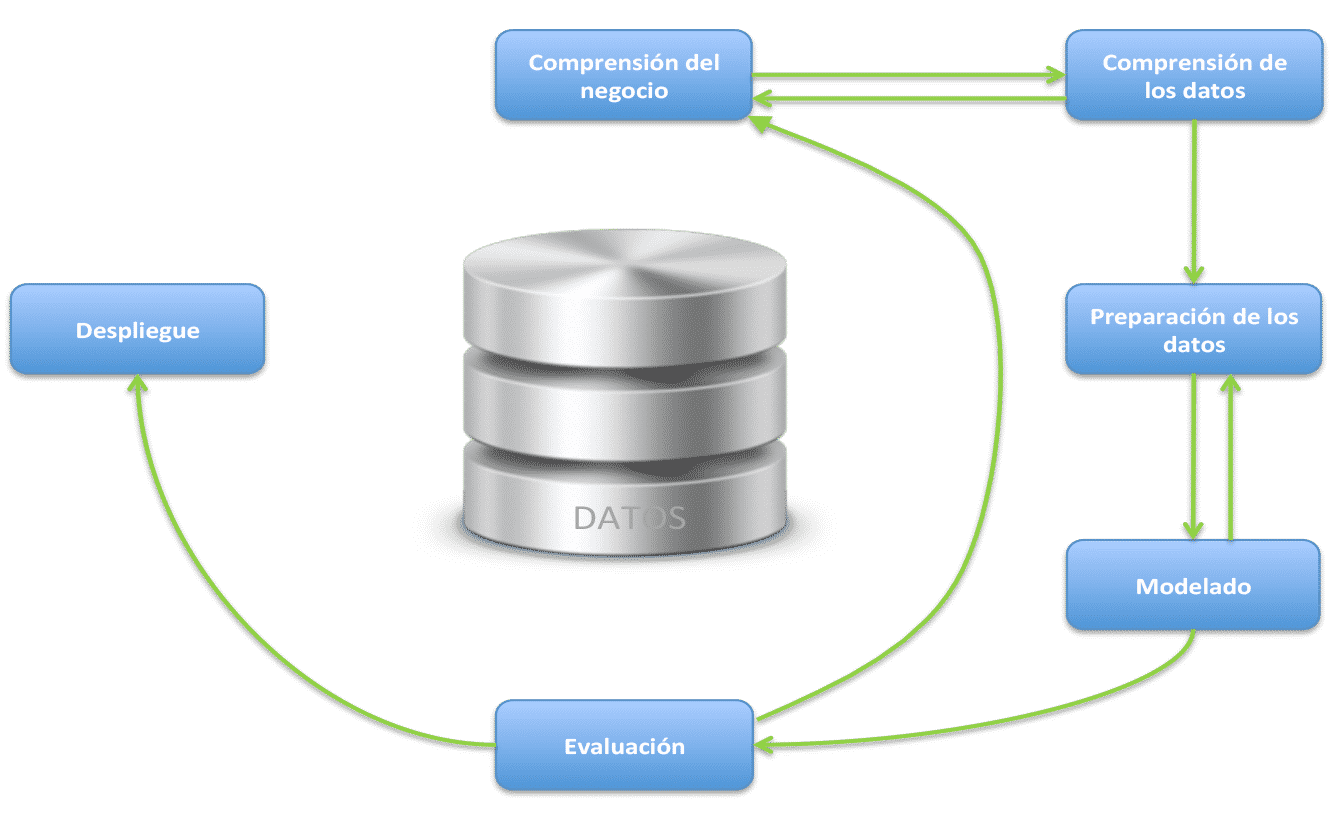

# Comprensión del negocio

El Gobierno de Chile busca implementar inteligencia artificial en su página web mediante el etiquetado de imágenes de distinto dominio. El objetivo principal del proyecto es poder seleccionar y clasificar imágenes, detectar objetos, estados de ánimo y rostros. Para lograr esto, se utilizarán técnicas de Inteligencia Artificial, como el Aprendizaje Automático, que permite a las computadoras aprender y generalizar patrones a partir de conocimiento previo.

Dentro del Aprendizaje Automático, se empleará el Aprendizaje Activo para mejorar la precisión y el rendimiento de los modelos de predicción. El conjunto de datos CIFAR-10 se utilizará en este caso, el cual consta de 60000 imágenes en color de 32x32 píxeles, distribuidas en 10 clases con 6000 imágenes por clase. Hay 50000 imágenes para entrenamiento y 10000 imágenes para pruebas. El conjunto de datos se divide en cinco lotes de entrenamiento y un lote de prueba, con 1000 imágenes seleccionadas al azar de cada clase en el lote de prueba. Los lotes de entrenamiento contienen las imágenes restantes, con exactamente 5000 imágenes de cada clase, aunque algunos lotes pueden tener más imágenes de una clase que de otra.

# Comprensión de los datos

El siguiente código carga el conjunto de datos CIFAR-10 y muestra una cuadrícula de imágenes de prueba. Cada imagen se etiqueta con su clase correspondiente, representada por un título en la cuadrícula. Se utilizan funciones de la biblioteca matplotlib.pyplot para configurar la visualización, como desactivar las divisiones de ejes y ocultar las etiquetas de los ejes. La cuadrícula de imágenes proporciona una representación visual de las muestras del conjunto de datos CIFAR-10, permitiendo una rápida comprensión de las imágenes y sus etiquetas.

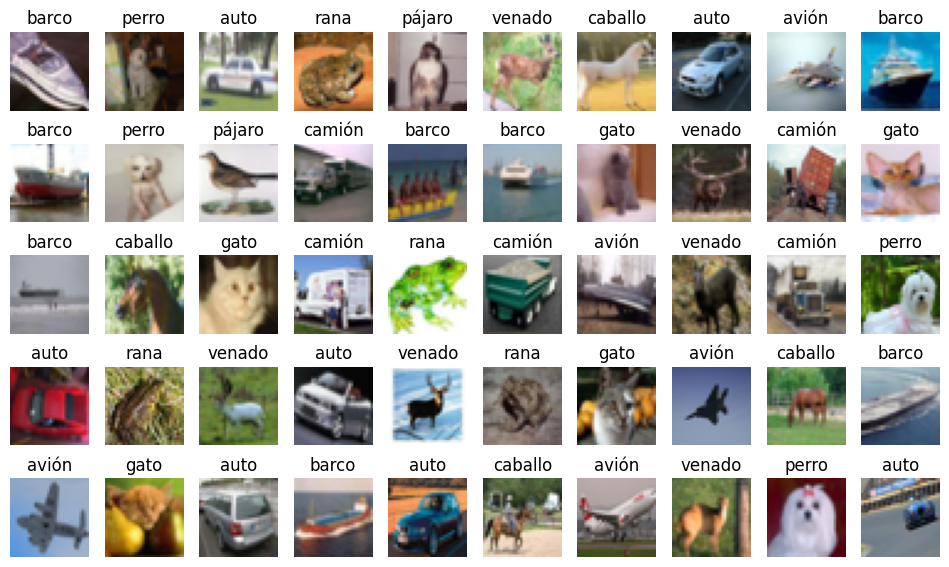

In [3]:
(imgs_train,labs_train), (imgs_test,labs_test) = keras.datasets.cifar10.load_data() # carga de datos

nombres = ['avión', 'auto', 'pájaro', 'gato', 'venado', 'perro', 'rana', 'caballo', 'barco', 'camión'] # nombres de las clases

h = 5 # alto de la cuadricula
w = 10 # ancho de la cuadricula
fig, axs = plt.subplots(h, w, figsize=(w+2, h+2)) # creación de la cuadricula
for i in range(h): # recorre las filas
  for j in range(w): # recorre las columnas
    ex = np.random.randint(len(imgs_test)) # elige un ejemplo al azar
    axs[i,j].set_title(nombres[labs_test[ex][0]]) # título de la imagen
    axs[i,j].imshow(imgs_test[ex]) # muestra la imagen
    axs[i,j].axis('off') # quita las rallitas de los ejes
plt.show() 


## Categoria de las imagenes

Afortunadamente, las categorías de las imágenes tienen las mismas cantidades de datos, por lo que no es necesario realizar un balanceo de los datos.

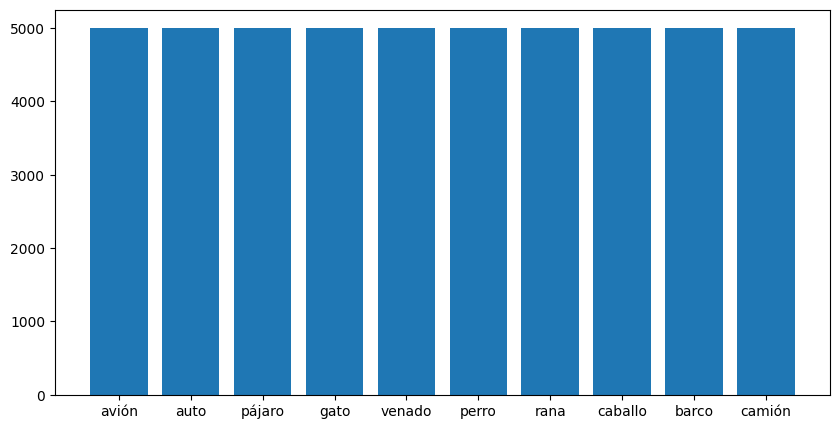

In [4]:
# Grafico conteo de categorías

plt.figure(figsize=(10,5)) # tamaño del gráfico
plt.bar(np.arange(10), np.sum(labs_train==np.arange(10), axis=0)) # gráfico de barras
plt.xticks(np.arange(10), nombres) # etiquetas del eje x
plt.show() # muestra el gráfico

Como se dijo en el caso, cada categoria tiene una cantidad de 5000 datos. Estos estan distribuidos entre lotes de 10000 datos, los cuales se usaran para entrenamiento.

## Dimensiones

En el conjunto de datos CIFAR-10, cada imagen tiene una resolución de 32x32 píxeles y tres canales de color (RGB). Por lo tanto, las dimensiones de los datos de entrenamiento y prueba son (50000, 32, 32, 3) y (10000, 32, 32, 3) respectivamente. En cuanto a las etiquetas, las dimensiones de las etiquetas de entrenamiento y prueba son (50000, 10) y (10000, 10) respectivamente. Estas dimensiones son esenciales para comprender la estructura de los datos y etiquetas en el conjunto CIFAR-10 y para realizar operaciones y análisis posteriores en el proceso de modelado y evaluación.

In [5]:
# Inspetion de los datos
print('Conjunto X')
print('Dimensiones de los datos de entrenamiento:', imgs_train.shape) # dimensiones de los datos de entrenamiento
print('Dimensiones de los datos de prueba:', imgs_test.shape) # dimensiones de los datos de prueba
print('\nConjunto Y')
print('Dimensiones de las etiquetas de entrenamiento:', labs_train.shape) # dimensiones de las etiquetas de entrenamiento
print('Dimensiones de las etiquetas de prueba:', labs_test.shape) # dimensiones de las etiquetas de prueba

Conjunto X
Dimensiones de los datos de entrenamiento: (50000, 32, 32, 3)
Dimensiones de los datos de prueba: (10000, 32, 32, 3)

Conjunto Y
Dimensiones de las etiquetas de entrenamiento: (50000, 1)
Dimensiones de las etiquetas de prueba: (10000, 1)


# Preparación de los datos

Debido a que se está trabajando con imagenes, estas se deben transformar a un formato que pueda ser procesado por el modelo. Para esto, se utilizan las librerías de Keras y Tensorflow, las cuales permiten cargar el conjunto de datos CIFAR-10 y transformar las imágenes a un formato que pueda ser procesado por el modelo. Además, se realiza una normalización de los datos para que los valores de los píxeles estén en el rango [0,1].

In [6]:
X_train = imgs_train.reshape(50000,32*32*3) # cantidad de ejemplos, tamaño de la imagen
X_test = imgs_test.reshape(10000,32*32*3)  # lo mismo para el conjunto de test
X_train = X_train / 255 # normalización (255 valores de color posibles)
X_test = X_test / 255 # lo mismo para el conjunto de test

Y_train = keras.utils.to_categorical(labs_train, 10) # convierte las etiquetas a categóricas usando (to_categorical de keras usa one-hot encoding)
Y_test = keras.utils.to_categorical(labs_test, 10) # lo mismo para el conjunto de test (to_categorical de keras usa one-hot encoding)


```
En el código proporcionado se establece la capacidad y los parámetros de entrenamiento de la red feed-forward. La capacidad de la red se configura mediante el número de neuronas en cada capa oculta. Se definen tres capas ocultas con 1024, 512 y 256 neuronas respectivamente, asignadas a las variables h1, h2 y h3.

Además, se especifica el número de épocas de entrenamiento (e) como 150, lo que indica la cantidad de veces que el modelo se ajustará a los datos de entrenamiento completo. También se establece el tamaño del lote (b) en 16, lo que significa que durante el entrenamiento se utilizarán lotes de 16 muestras a la vez para actualizar los pesos de la red.

Estos parámetros de capacidad y entrenamiento son ajustables según las necesidades del problema y los recursos disponibles. Un mayor número de neuronas en las capas ocultas puede permitir a la red aprender representaciones más complejas, pero también puede aumentar el costo computacional. El número de épocas y el tamaño del lote influyen en la cantidad y velocidad de aprendizaje del modelo durante el entrenamiento.

Con esta configuración, la red feed-forward está lista para ser entrenada y evaluar su rendimiento en el conjunto de datos adecuado.

En el codigo se establece la cantidad de neuronas de las capas ocultas, la cantidad de epocas y el tamaño del batch. Se establece un tamaño de batch de 32, ya que es el tamaño que se utiliza en la mayoria de los casos. Se establecio en las variables h1, h2, h3 una cantidad de 1024, 512 y 256 neuronas respectivamente experimentando en base a casos anteriormente vistos en clases. Se modificaran las variables en futuras pruebas para probar distintos resultados. 

In [7]:
M_train = X_train.shape[0]
M_test = X_test.shape[0]

N = X_train.shape[1]
C = Y_train.shape[1]

print(N,C,M_train,M_test)

3072 10 50000 10000


In [8]:
h1 = 1024 # cantidad de neuronas de la capa oculta 1
h2 = 512 # cantidad de neuronas de la capa oculta 2
h3 = 256  # cantidad de neuronas de la capa oculta 3

e = 20 # cantidad de épocas
b = 32 # tamaño del batch (tamaño del conjunto de entrenamiento que se usa en cada época)

# Modelado

```
En el código proporcionado se realiza la configuración, compilación y entrenamiento de una red feed-forward con regularización. Primero, se establecen las semillas (seeds) tanto para numpy como para TensorFlow con el objetivo de garantizar la reproducibilidad de los resultados.

A continuación, se crea el modelo secuencial utilizando la clase Sequential de Keras. La red consta de varias capas ocultas, cada una de ellas definida mediante la función Dense de Keras. Se utilizan las variables h1, h2 y h3 para determinar el número de neuronas en cada capa oculta. Además, se incorporan capas de dropout entre las capas ocultas para aplicar regularización y mitigar el sobreajuste.

Tras definir la arquitectura de la red, se imprime un resumen utilizando el método summary() de Keras, que muestra el número de parámetros entrenables en cada capa y el tamaño de la salida de cada capa.

Luego, se compila la red especificando la función de pérdida como categorical_crossentropy, el optimizador como sgd (descenso de gradiente estocástico) y se selecciona la métrica de precisión (accuracy) para evaluar el rendimiento del modelo durante el entrenamiento.

Finalmente, se realiza el entrenamiento de la red utilizando el método fit(). Se proporcionan los datos de entrenamiento (X_train y Y_train), se establece el número de épocas (e) y el tamaño del lote (b), y se incluye el conjunto de validación (X_test y Y_test) para evaluar la precisión en cada época.

Con esta configuración y entrenamiento, la red feed-forward con regularización está lista para ser ajustada a los datos de entrenamiento y evaluar su rendimiento en el conjunto de validación.

EL NICO ESCRIBE AQUI 

In [14]:
np.random.seed(30) # semilla para reproducibilidad
tf.random.set_seed(30) # semilla para reproducibilidad

red = keras.Sequential() # modelo secuencial
red.add(keras.layers.Dense(h1, input_dim=N, activation='relu')) # capa oculta 1
red.add(keras.layers.Dropout(0.2)) # dropout 1
red.add(keras.layers.Dense(h2, activation='relu')) # capa oculta 2
red.add(keras.layers.Dropout(0.2)) # dropout 2
red.add(keras.layers.Dense(h3, activation='relu')) # capa oculta 3
red.add(keras.layers.Dropout(0.2)) # dropout 3
red.add(keras.layers.Dense(C, activation='softmax')) # capa de salida

red.summary() # imprime un resumen de la red

optimizer = keras.optimizers.SGD() # optimizador

red.compile( # compilación de la red
    loss='categorical_crossentropy', # función de pérdida
    optimizer=optimizer, # optimizador
    metrics=['accuracy'] # métrica a mostrar
)


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 1024)              3146752   
                                                                 
 dropout_3 (Dropout)         (None, 1024)              0         
                                                                 
 dense_5 (Dense)             (None, 512)               524800    
                                                                 
 dropout_4 (Dropout)         (None, 512)               0         
                                                                 
 dense_6 (Dense)             (None, 256)               131328    
                                                                 
 dropout_5 (Dropout)         (None, 256)               0         
                                                                 
 dense_7 (Dense)             (None, 10)               

```
El código presentado muestra el entrenamiento de la red feed-forward utilizando el método fit() de TensorFlow-Keras. Los datos de entrenamiento (X_train y Y_train) se utilizan para ajustar los pesos de la red durante el entrenamiento.

Se especifica la cantidad de épocas de entrenamiento (e) y el tamaño del lote (b) mediante los parámetros epochs y batch_size respectivamente. Esto determina la cantidad de veces que la red se ajustará a los datos de entrenamiento completo y la cantidad de muestras que se utilizarán para actualizar los pesos en cada iteración.

Además, se proporciona un conjunto de validación mediante el parámetro validation_data. Esto permite evaluar el rendimiento de la red en un conjunto de datos separado durante el entrenamiento, lo que ayuda a monitorear el progreso y detectar posibles problemas de sobreajuste o bajo ajuste.

El resultado del entrenamiento se guarda en el objeto hist, que contiene información sobre la evolución de la función de pérdida y las métricas de evaluación a lo largo de las épocas.

Con esta configuración, la red feed-forward se entrena utilizando los datos de entrenamiento y se evalúa su rendimiento en el conjunto de validación.

EL NICO ESCRIBE AQUI 

In [15]:
hist_reg = red.fit(X_train, Y_train, # entrenamiento de la red
        epochs=e, # cantidad de épocas
        batch_size=b, # tamaño del batch
        validation_data=(X_test,Y_test) # conjunto de validación
       )

Epoch 1/20
1563/1563 [==============================] - 9s 5ms/step - loss: 1.9532 - accuracy: 0.2886 - val_loss: 1.7565 - val_accuracy: 0.3752
Epoch 2/20
1563/1563 [==============================] - 7s 4ms/step - loss: 1.7712 - accuracy: 0.3657 - val_loss: 1.6688 - val_accuracy: 0.4072
Epoch 3/20
1563/1563 [==============================] - 7s 5ms/step - loss: 1.6965 - accuracy: 0.3946 - val_loss: 1.6109 - val_accuracy: 0.4243
Epoch 4/20
1563/1563 [==============================] - 8s 5ms/step - loss: 1.6426 - accuracy: 0.4145 - val_loss: 1.5645 - val_accuracy: 0.4484
Epoch 5/20
1563/1563 [==============================] - 7s 4ms/step - loss: 1.6001 - accuracy: 0.4308 - val_loss: 1.5593 - val_accuracy: 0.4404
Epoch 6/20
1563/1563 [==============================] - 8s 5ms/step - loss: 1.5636 - accuracy: 0.4435 - val_loss: 1.6419 - val_accuracy: 0.4090
Epoch 7/20
1563/1563 [==============================] - 7s 5ms/step - loss: 1.5322 - accuracy: 0.4539 - val_loss: 1.5018 - val_accuracy:

# Evaluación

```
El código presentado genera un gráfico que muestra la función de pérdida durante el entrenamiento y la validación de la red. Se utiliza la biblioteca matplotlib para crear el gráfico.

Se establece el tamaño del gráfico con figsize=(10,5) para asegurar una visualización adecuada. A continuación, se traza la curva de la pérdida en el entrenamiento utilizando hist.history['loss'] y se etiqueta como "entrenamiento". Asimismo, se traza la curva de la pérdida en la validación utilizando hist.history['val_loss'] y se etiqueta como "validación".

Se agrega una etiqueta al eje x con el texto "Épocas" y una etiqueta al eje y con el texto "Pérdida". Se muestra una leyenda para distinguir entre la pérdida en el entrenamiento y la validación.

Finalmente, se muestra el gráfico utilizando la función plt.show().

Este gráfico es útil para visualizar cómo la pérdida varía durante el entrenamiento y la validación de la red. Permite evaluar si el modelo está aprendiendo correctamente y si existe sobreajuste o subajuste. El objetivo es observar una disminución de la pérdida tanto en el entrenamiento como en la validación, lo que indicaría un buen rendimiento del modelo.

EL NICO ESCRIBE AQUI 

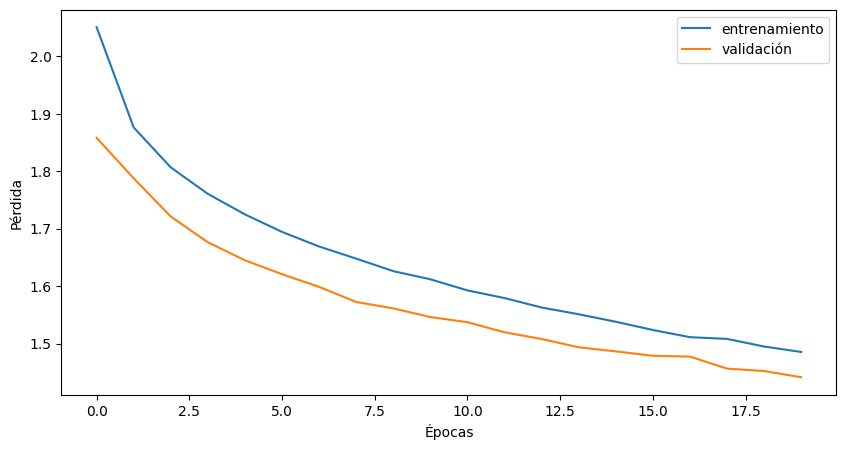

In [11]:
# Gráfico de la función de pérdida en el entrenamiento y la validación

plt.figure(figsize=(10,5)) # tamaño del gráfico
plt.plot(hist_reg.history['loss'], label='entrenamiento') # pérdida en el entrenamiento
plt.plot(hist_reg.history['val_loss'], label='validación') # pérdida en la validación
plt.xlabel('Épocas') # etiqueta del eje x
plt.ylabel('Pérdida') # etiqueta del eje y
plt.legend() # muestra la leyenda
plt.show() # muestra el gráfico

```
El código proporcionado genera un gráfico que muestra la precisión durante el entrenamiento y la validación de la red. Se utiliza la biblioteca matplotlib para crear el gráfico.

Se establece el tamaño del gráfico con figsize=(10,5) para asegurar una visualización adecuada. A continuación, se traza la curva de la precisión en el entrenamiento utilizando hist.history['accuracy'] y se etiqueta como "entrenamiento". Asimismo, se traza la curva de la precisión en la validación utilizando hist.history['val_accuracy'] y se etiqueta como "validación".

Se agrega una etiqueta al eje x con el texto "Épocas" y una etiqueta al eje y con el texto "Precisión". Se muestra una leyenda para distinguir entre la precisión en el entrenamiento y la validación.

Finalmente, se muestra el gráfico utilizando la función plt.show().

Este gráfico es útil para visualizar cómo la precisión varía durante el entrenamiento y la validación de la red. Permite evaluar el desempeño del modelo a lo largo de las épocas y verificar si hay sobreajuste o subajuste. Idealmente, se busca un aumento progresivo en la precisión tanto en el entrenamiento como en la validación, lo que indicaría un buen rendimiento del modelo.

EL NICO ESCRIBE AQUI

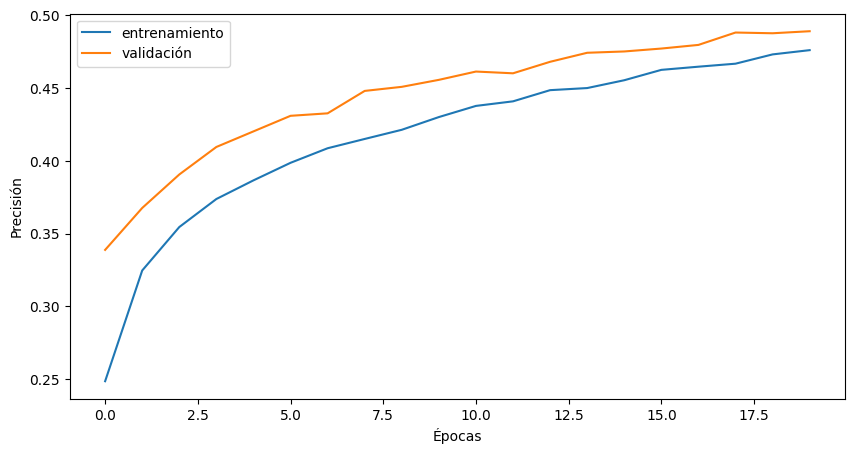

In [12]:
# Gráfico de la precisión en el entrenamiento y la validación

plt.figure(figsize=(10,5)) # tamaño del gráfico
plt.plot(hist_reg.history['accuracy'], label='entrenamiento') # precisión en el entrenamiento
plt.plot(hist_reg.history['val_accuracy'], label='validación') # precisión en la validación
plt.xlabel('Épocas') # etiqueta del eje x
plt.ylabel('Precisión') # etiqueta del eje y
plt.legend() # muestra la leyenda
plt.show() # muestra el gráfico

In [16]:
# Evaluación de la red

loss, acc = red.evaluate(X_test, Y_test) # evaluación de la red
print('Pérdida:', loss) # pérdida
print('Precisión:', acc) # precisión



313/313 [==============================] - 1s 3ms/step - loss: 1.3719 - accuracy: 0.5020
Pérdida: 1.3718767166137695
Precisión: 0.5019999742507935


# Despliegue